In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# Data Cleaning & PreProcessing

# removing junk char
import re
import string

# tokenization
from nltk import tokenize
from nltk.tokenize import sent_tokenize,word_tokenize

#stopwords
from nltk.corpus import stopwords

# Stemming 
from nltk.stem import PorterStemmer as ps

# Lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer

#pos tagging
import nltk

In [3]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Data Importing 

In [5]:
amazon = pd.read_csv('Amazon_Review.csv',encoding='latin-1')

In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41420 entries, 0 to 41419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    41420 non-null  object
 1   name                  28045 non-null  object
 2   asins                 28028 non-null  object
 3   brand                 34644 non-null  object
 4   categories            34531 non-null  object
 5   keys                  34531 non-null  object
 6   manufacturer          34659 non-null  object
 7   reviews.date          34627 non-null  object
 8   reviews.dateAdded     30750 non-null  object
 9   reviews.dateSeen      34643 non-null  object
 10  reviews.didPurchase   960 non-null    object
 11  reviews.doRecommend   34252 non-null  object
 12  reviews.id            719 non-null    object
 13  reviews.numHelpful    33794 non-null  object
 14  reviews.rating        28592 non-null  object
 15  reviews.sourceURLs    33943 non-null

In [7]:
amazon.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'],
      dtype='object')

In [8]:
amazon.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
amazon.drop(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'],axis=1,inplace=True)

In [10]:
amazon.head()

,reviews.text
0,This product so far has not disappointed. My c...
1,great for beginner or experienced person. Boug...
2,Inexpensive tablet for him to use and learn on...
3,I've had my Fire HD 8 two weeks now and I love...
4,I bought this for my grand daughter when she c...


In [11]:
amazon.rename({'reviews.text':'review'},axis=1,inplace=True)

In [12]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41420 entries, 0 to 41419
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  34440 non-null  object
dtypes: object(1)
memory usage: 323.7+ KB


In [13]:
amazon.dropna(axis=0,inplace=True)

In [14]:
amazon.isna().sum()

review    0
dtype: int64

### Preprocess

In [15]:
amazon = [x.strip() for x in amazon['review']]

amazon = [x for x in amazon if x]

amazon[:5]

['This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person. Bought as a gift and she loves it',
 'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.",
 'I bought this for my grand daughter 

In [ ]:
# Sentence tokenized data

In [16]:
amazon_token = tokenize.sent_tokenize(' '.join(amazon))

amazon_token[0:50]

['This product so far has not disappointed.',
 'My children love to use it and I like the ability to monitor control what content they see with ease.',
 'great for beginner or experienced person.',
 'Bought as a gift and she loves it Inexpensive tablet for him to use and learn on, step up from the NABI.',
 'He was thrilled with it, learn how to Skype on it already...',
 "I've had my Fire HD 8 two weeks now and I love it.",
 'This tablet is a great value.We are Prime Members and that is where this tablet SHINES.',
 'I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model.',
 'The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.',
 'I bought this fo

In [26]:
amazon_df = pd.DataFrame(amazon_token[0:1000],columns=['review'])

In [18]:
amazon_df.head()

,review
0,This product so far has not disappointed.
1,My children love to use it and I like the abil...
2,great for beginner or experienced person.
3,Bought as a gift and she loves it Inexpensive ...
4,"He was thrilled with it, learn how to Skype on..."


In [ ]:
# Calculating affinity score now

In [20]:
affin = pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [21]:
# creating a dict 

affinity_score = affin.set_index('word')['value'].to_dict()

In [22]:
affinity_score 

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# assign the sentiment score to each tweet

In [23]:
def calculating_sentiment(text: str=None):
    
    sentiment_score = 0
    
    if text:
        
        sentence = nlp(text)
        
        for word in sentence:
            sentiment_score += affinity_score.get(word.lemma_,0)
        
        return sentiment_score
            

In [24]:
calculating_sentiment('best')

3

In [27]:
# now cal sentiment score for each review

amazon_df['Sentiment_value'] = amazon_df['review'].apply(calculating_sentiment)

In [28]:
amazon_df.head()

,review,Sentiment_value
0,This product so far has not disappointed.,-2
1,My children love to use it and I like the abil...,9
2,great for beginner or experienced person.,3
3,Bought as a gift and she loves it Inexpensive ...,5
4,"He was thrilled with it, learn how to Skype on...",0


In [29]:
amazon_df['index'] = range(0,len(amazon_df))

In [30]:
amazon_df['word_count'] = amazon_df['review'].str.split().apply(len)

In [31]:
amazon_df.head()

,review,Sentiment_value,index,word_count
0,This product so far has not disappointed.,-2,0,7
1,My children love to use it and I like the abil...,9,1,20
2,great for beginner or experienced person.,3,2,6
3,Bought as a gift and she loves it Inexpensive ...,5,3,22
4,"He was thrilled with it, learn how to Skype on...",0,4,12


In [32]:
amazon_df[amazon_df['Sentiment_value']>=8]

,review,Sentiment_value,index,word_count
1,My children love to use it and I like the abil...,9,1,20
7,I love being able to easily access all of the ...,11,7,53
18,"Great for e-reading on the go, nice and light ...",8,18,20
20,They loved it and how easy they are to use wit...,8,20,13
33,Thank youAnd silk works wonders Got it as a pr...,10,33,30
38,Great video quality lots of fun apps fun for t...,28,38,76
43,Very happy with this product and easy to use.....,8,43,27
69,Overall a nice product for traveling purposes ...,10,69,31
88,Tablet is perfect for beginners who just want ...,9,88,52
146,I highly recommend this for beginners Really e...,8,146,21


In [33]:
np.max(amazon_df['Sentiment_value'])

28

In [34]:
np.min(amazon_df['Sentiment_value'])

-5

In [35]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score <10:
        return 'Positive'
    else:
        return 'Fans'

In [36]:
amazon_df['Sentiment'] = amazon_df['Sentiment_value'].apply(getAnalysis)

In [37]:
amazon_df.head()

,review,Sentiment_value,index,word_count,Sentiment
0,This product so far has not disappointed.,-2,0,7,Negative
1,My children love to use it and I like the abil...,9,1,20,Positive
2,great for beginner or experienced person.,3,2,6,Positive
3,Bought as a gift and she loves it Inexpensive ...,5,3,22,Positive
4,"He was thrilled with it, learn how to Skype on...",0,4,12,Positive


In [38]:
amazon_df['Sentiment'].value_counts()

Positive    922
Negative     57
Fans         21
Name: Sentiment, dtype: int64

<AxesSubplot:>

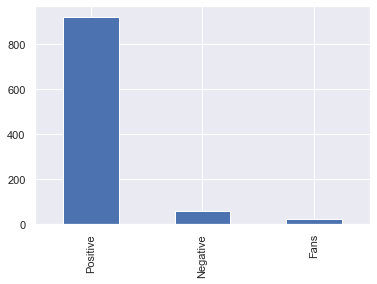

In [39]:
amazon_df['Sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

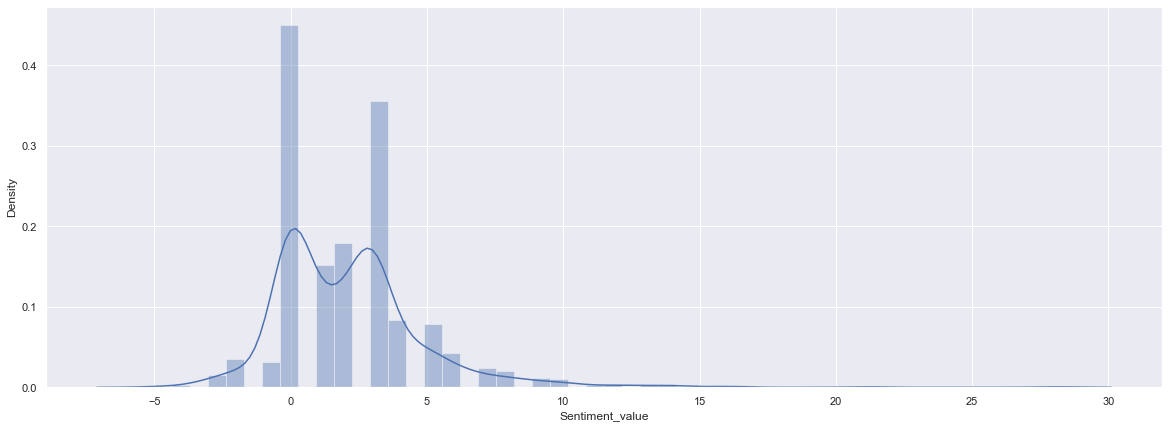

In [40]:
# Ploting Distribution 

plt.figure(figsize=(20,7))

sns.distplot(amazon_df['Sentiment_value'])